In [19]:
import torchvision
from torchvision.models.detection import fasterrcnn_resnet50_fpn

# Загрузим предобученную модель
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()  # Устанавливаем модель в режим evaluation


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [20]:
from torchvision import transforms
from PIL import Image
import torch


# Загрузка изображения
image_path = "photo_.jpg"
image = Image.open(image_path).convert("RGB")

# Преобразование изображения
transform = transforms.Compose([
    transforms.ToTensor()
])

image_tensor = transform(image).unsqueeze(0)


In [21]:
with torch.no_grad():
    prediction = model(image_tensor)


In [22]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Отобразим изображение с обнаруженными объектами
fig, ax = plt.subplots(1, figsize=(12, 9))
ax.imshow(image)

# Настройка порога для фильтрации слабых детекций
confidence_threshold = 0.5

for box, score, label in zip(prediction[0]['boxes'], prediction[0]['scores'], prediction[0]['labels']):
    if score > confidence_threshold:
        rect = patches.Rectangle((box[0], box[1]), box[2]-box[0], box[3]-box[1], 
                                 linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        ax.text(box[0], box[1], str(label), color="white")

plt.axis("off")
plt.show()


Using cache found in /home/gea/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-10-9 Python-3.8.10 torch-2.0.1+cu117 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


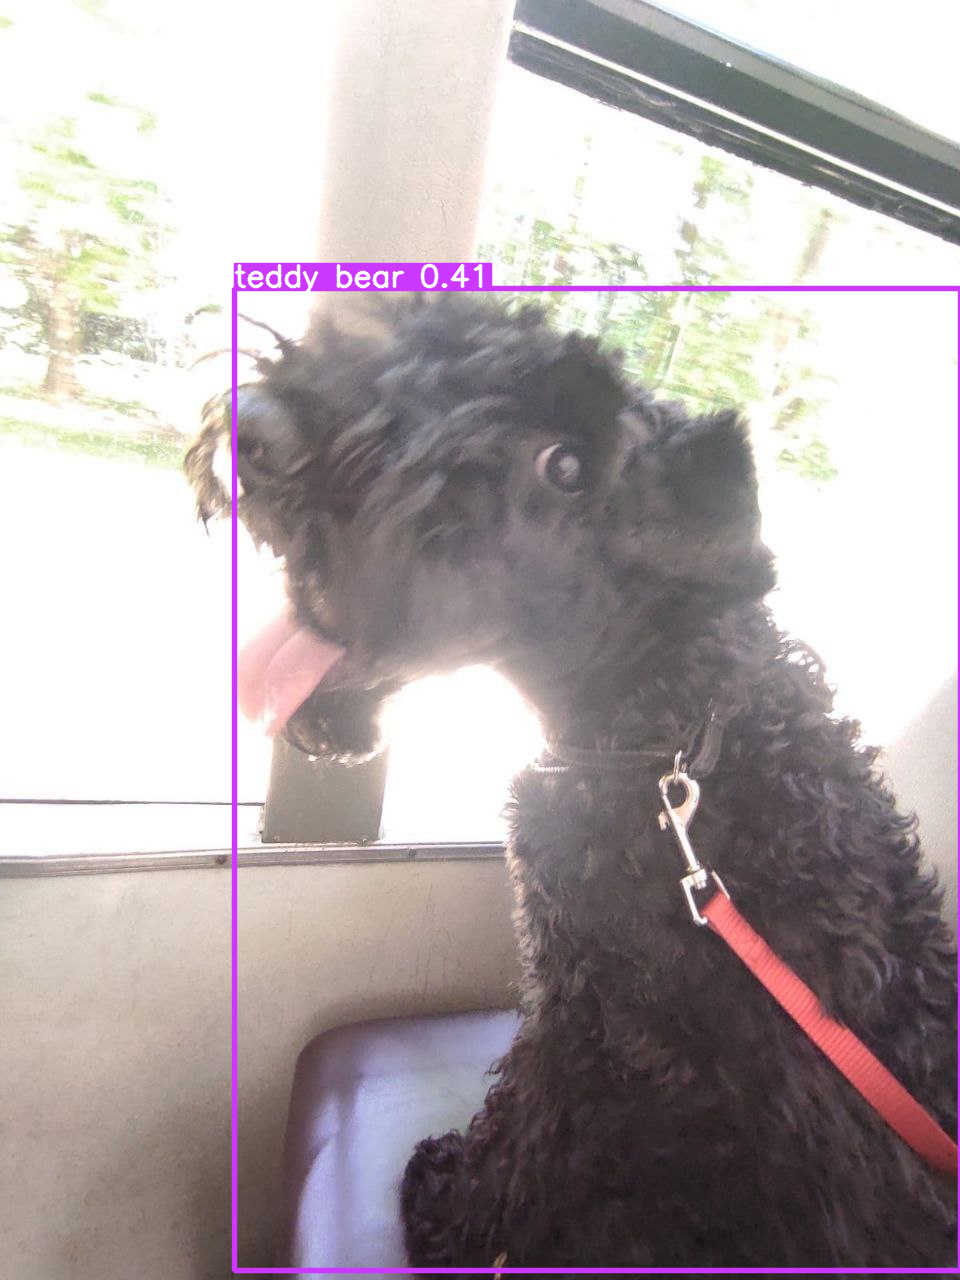

In [23]:
import torch
import torchvision.transforms as transforms
from torchvision.models.detection import fasterrcnn_resnet50_fpn, transform
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Загрузка предварительно обученной модели YOLOv3
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # это YOLOv5s, небольшая версия YOLOv5
model.eval()

# Загрузка изображения
image_path = "photo_.jpg"
image = Image.open(image_path)

# Преобразование изображения и детекция
results = model(image)

# Отрисовка результатов
results.show()


In [9]:
import torch
from torchvision.models.detection import ssdlite320_mobilenet_v3_large
from torchvision.transforms import functional as F
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [17]:
# Загрузка предварительно обученной модели SSD
model = ssdlite320_mobilenet_v3_large(pretrained=True)
model.eval()

# Загрузка изображения
image_path = "photo_.jpg"
image = Image.open(image_path).convert("RGB")

# Преобразование изображения и детекция
tensor_image = F.to_tensor(image).unsqueeze(0)
with torch.no_grad():
    prediction = model(tensor_image)

# Отрисовка результатов на изображении
image = torch.tensor(tensor_image[0].permute(1, 2, 0).numpy())
fig, ax = plt.subplots(1)
ax.imshow(image)

In [11]:
threshold = 0.1
predicted_boxes = prediction[0]['boxes'][prediction[0]['scores'] > threshold].numpy()
for box in predicted_boxes:
    rect = patches.Rectangle((box[0], box[1]), box[2]-box[0], box[3]-box[1], linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

plt.show()


In [12]:
print(len(predicted_boxes))


3


In [13]:
predicted_boxes

array([[     658.84,      776.25,      937.63,      1193.1],
       [     215.42,         275,         960,      1272.2],
       [     290.78,      268.71,      952.64,        1280]], dtype=float32)

In [15]:
# Загрузка изображения
image_path = "photo_.jpg"
image = Image.open(image_path).convert("RGB")
plt.imshow(image)
plt.show()
